In [18]:
!pip install matplotlib seaborn sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.6/580.6 KB 8.2 MB/s eta 0:00:0000:0100:01


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np

In [4]:
user = "admin"
password = "password"
database = "dw_sales"
host = "localhost"
port = 5432

engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

In [8]:
df = pd.read_sql("SELECT city, COUNT(*) as number_customer FROM dim_customers GROUP BY city",engine)

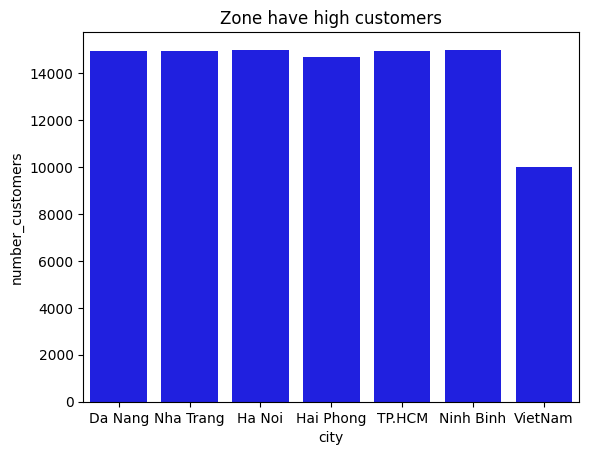

In [9]:
sns.barplot(x="city", y="number_customer",data=df,color="blue")
plt.title("Zone have high customers")
plt.xlabel("city")
plt.ylabel("number_customers")
plt.show()

In [7]:
df = pd.read_sql("SELECT product_name, rating, brand FROM dim_products ORDER BY rating DESC LIMIT 10",engine)
df.head()


,product_name,rating,brand
0,Antipyretic,5.0,Pharmacy
1,Lamp,5.0,La-Z-Boy
2,Bookshelf,5.0,Harvey Norman
3,Detective Books,5.0,HarperCollins
4,PC,5.0,Acer


In [27]:
df = pd.read_sql("SELECT brand, quantity,rating FROM dim_products ORDER BY quantity DESC LIMIT 10",engine)
df_melted = df.melt(id_vars="brand", value_vars=["quantity", "rating"], 
                    var_name="metric", value_name="value")


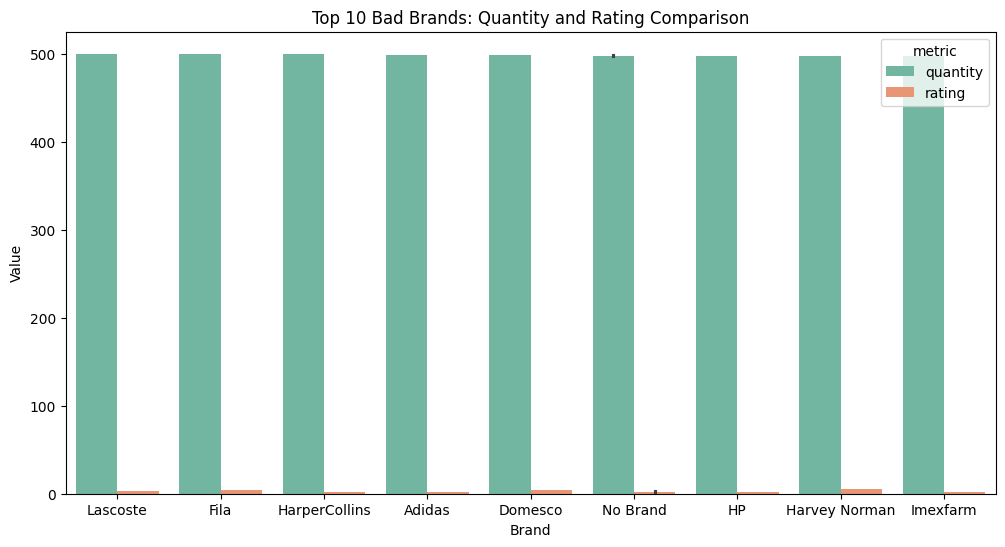

In [28]:

plt.figure(figsize=(12, 6))
sns.barplot(x="brand", y="value", hue="metric", data=df_melted, palette="Set2")

plt.xlabel("Brand")
plt.ylabel("Value")
plt.title("Top 10 Bad Brands: Quantity and Rating Comparison")
plt.show()

In [24]:
df = pd.read_sql("SELECT brand, quantity,rating FROM dim_products ORDER BY quantity ASC LIMIT 10",engine)
df_melted = df.melt(id_vars="brand", value_vars=["quantity", "rating"], 
                    var_name="metric", value_name="value")

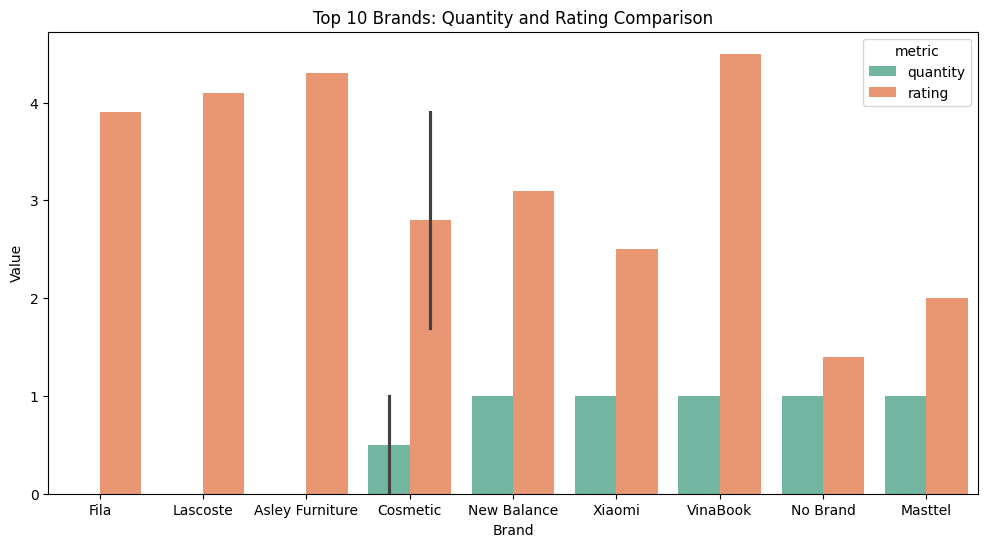

In [25]:

plt.figure(figsize=(12, 6))
sns.barplot(x="brand", y="value", hue="metric", data=df_melted, palette="Set2")

plt.xlabel("Brand")
plt.ylabel("Value")
plt.title("Top 10 Brands: Quantity and Rating Comparison")
plt.show()

In [32]:
df = pd.read_sql("""
    SELECT dc.city, SUM(fo.total_price) AS revenue
    FROM dim_customers dc
    JOIN fact_orders fo ON dc.customer_key = fo.customer_key
    GROUP BY dc.city
    ORDER BY revenue DESC
    LIMIT 10
""", engine)

/tmp/ipykernel_8242/3164994867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="revenue", data=df, palette="viridis")


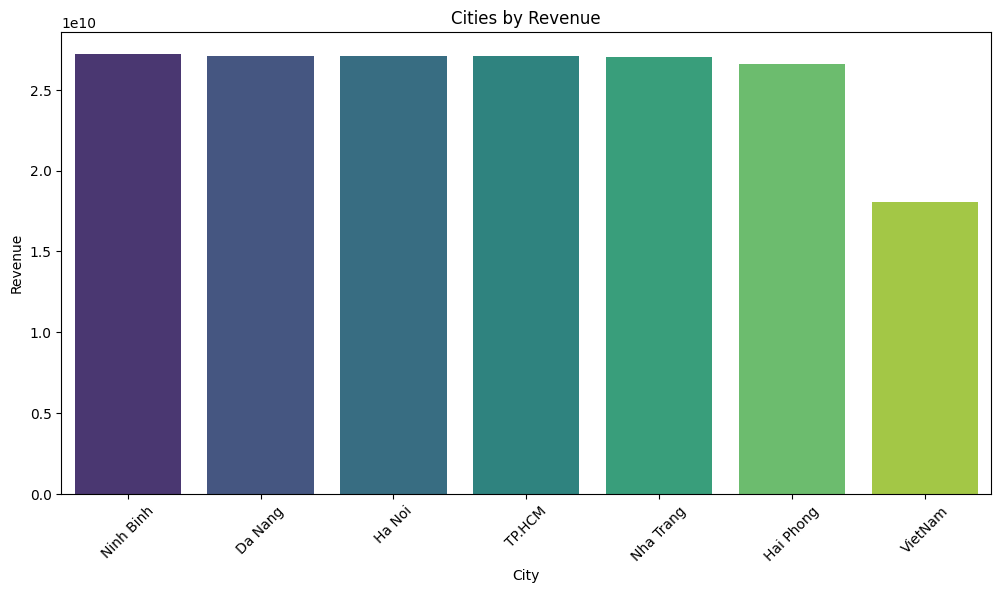

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x="city", y="revenue", data=df, palette="viridis")

plt.xlabel("City")
plt.ylabel("Revenue")
plt.title("Cities by Revenue")
plt.xticks(rotation=45) 
plt.show()

In [45]:
df = pd.read_sql("""
    SELECT dc.customer_name, SUM(fo.total_price) AS total_buy
    FROM dim_customers AS dc
    JOIN fact_orders fo ON dc.customer_key = fo.customer_key
    WHERE dc.customer_name <> 'John Doe'
    GROUP BY dc.customer_name
    ORDER BY total_buy DESC
    LIMIT 10
""", engine)

/tmp/ipykernel_8242/1754259093.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_name", y="total_buy", data=df, palette="viridis")


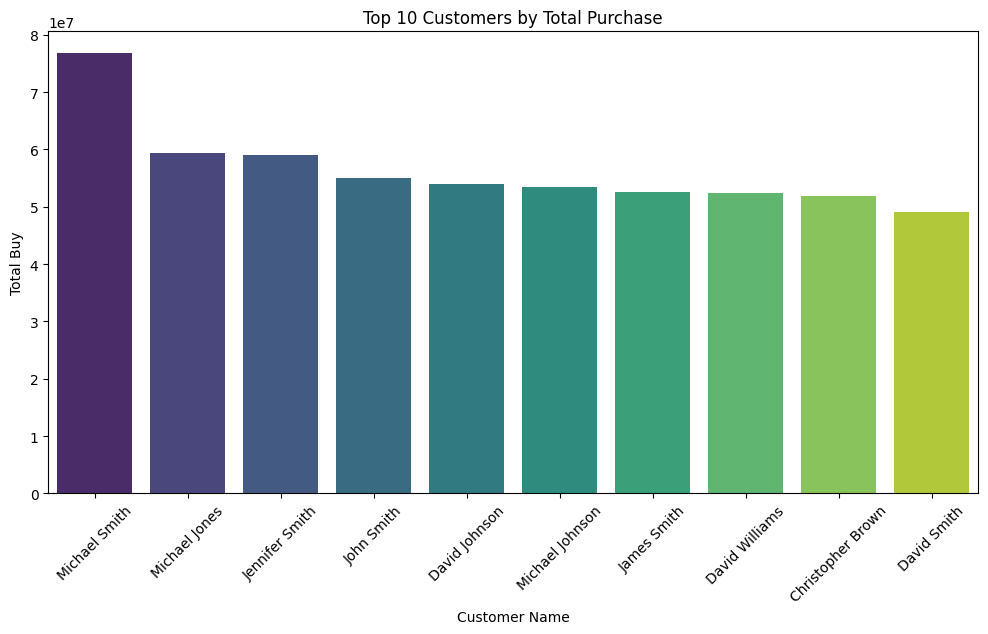

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_name", y="total_buy", data=df, palette="viridis")

plt.xlabel("Customer Name")
plt.ylabel("Total Buy")
plt.title("Top 10 Customers by Total Purchase")
plt.xticks(rotation=45) 
plt.show()